<a href="https://colab.research.google.com/github/nguyenanhbinh27042002/Artificial-intelligence-AI-/blob/main/ConLacNguoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=988ab2e535650afe0f61e46f32a56ed6cdaca9c55f9111d2f5c8ff80221e7d41
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [4]:
from skfuzzy.control.controlsystem import Antecedent
import numpy as np
import skfuzzy as fuzz
import math
from math import cos,sin,tan,pi 
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axis3d
from networkx.algorithms.bipartite import projection


<ipython-input-5-14e618fcba21>:50: UserWarning: The following kwargs were not used by contour: 'anlpha'
  cset = ax.contourf(x,y,z,zdir='z',offset = 5,cmap='viridis',anlpha = 0.5)
<ipython-input-5-14e618fcba21>:51: UserWarning: The following kwargs were not used by contour: 'anlpha'
  cset = ax.contourf(x,y,z,zdir='y',offset = 10,cmap='viridis',anlpha = 0.5)
<ipython-input-5-14e618fcba21>:52: UserWarning: The following kwargs were not used by contour: 'anlpha'
  cset = ax.contourf(x,y,z,zdir='x',offset = 15,cmap='viridis',anlpha = 0.5)


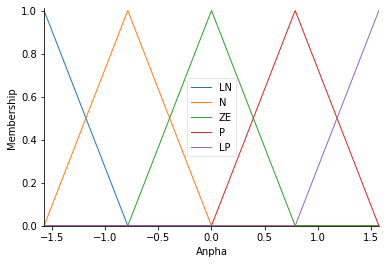

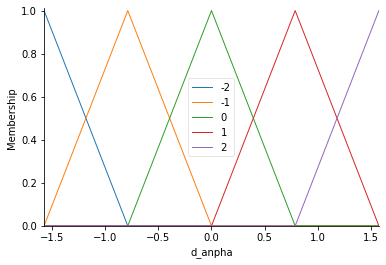

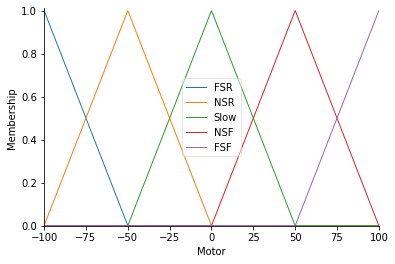

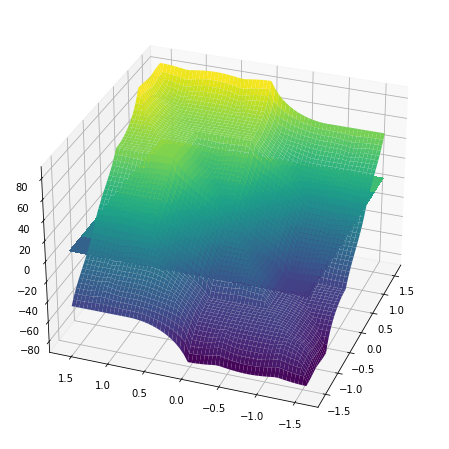

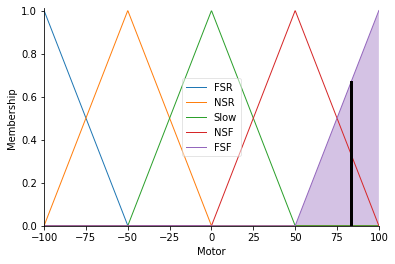

In [5]:

universe = np.linspace(-np.pi/2,np.pi/2,61)
universe1 = np.linspace(-100,100,1000)
#Input
a=ctrl.Antecedent(universe,'Anpha')
da=ctrl.Antecedent(universe,'d_anpha')
#Output
M=ctrl.Consequent(universe1,'Motor')

namea=['LN','N','ZE','P','LP']
nameda=['-2','-1','0','1','2']
namesT=['FSR','NSR','Slow','NSF','FSF']

a.automf(names=namea)
da.automf(names=nameda)
M.automf(names=namesT)

a.view()
da.view()
M.view()

rule = []

rule.append(ctrl.Rule(antecedent=((a['LN'] & da['-2'])|(a['LN'] & da['-1'])|(a['LN'] & da['0'])|
                                  (a['N'] & da['-2'])),consequent=M['FSR'],label='rule FSR'))
rule.append(ctrl.Rule(antecedent=((a['ZE'] & da['-2'])|(a['N'] & da['-1'])|(a['ZE'] & da['-1'])|
                                  (a['N'] & da['0'])|(a['LN'] & da['1'])|(a['LN'] & da['2'])),consequent=M['NSR'],label='rule NSR'))
rule.append(ctrl.Rule(antecedent=((a['P'] & da['-2'])|(a['P'] & da['-1'])|(a['ZE'] & da['0'])|
                                  (a['N'] & da['1'])|(a['N'] & da['2'])),consequent=M['Slow'],label='rule Slow'))
rule.append(ctrl.Rule(antecedent=((a['LP'] & da['-2'])|(a['LP'] & da['-1'])|(a['P'] & da['0'])|
                                  (a['P'] & da['1'])|(a['ZE'] & da['1'])|(a['ZE'] & da['2'])),consequent=M['NSF'],label='rule NSF'))
rule.append(ctrl.Rule(antecedent=((a['LP'] & da['0'])|(a['LP'] & da['1'])|(a['LP'] & da['2'])|(a['P'] & da['2'])),consequent=M['FSF'],label='rule FSF'))
#Control system
motor_ctrl = ctrl.ControlSystem(rule)
motor_simulation=ctrl.ControlSystemSimulation(motor_ctrl,flush_after_run=61*61+1)
# Compute
upsampled = np.linspace(-pi/2,pi/2,61)
x,y = np.meshgrid(upsampled,upsampled)
z =np.zeros_like(x)
for i in range(61):
  for j in range(61):
      motor_simulation.input['Anpha']= x[i,j]
      motor_simulation.input['d_anpha']= y[i,j]
      motor_simulation.compute()
      z[i,j]= motor_simulation.output['Motor']

# print(motor_simulation.output['Motor'])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
suf = ax.plot_surface(x,y,z,rstride=1 ,cstride=1 ,cmap='viridis',linewidth=0.4,antialiased =True)
cset = ax.contourf(x,y,z,zdir='z',offset = 5,cmap='viridis',anlpha = 0.5)
cset = ax.contourf(x,y,z,zdir='y',offset = 10,cmap='viridis',anlpha = 0.5)
cset = ax.contourf(x,y,z,zdir='x',offset = 15,cmap='viridis',anlpha = 0.5)
ax.view_init(30,200)

# power
M.view(sim = motor_simulation)

